# Latar Belakang



Perusahaan dalam bidang maskapai penerbangan melakukan survey mengenai kepuasan kustomer terhadap berbagaimacam layanan yang telah diberikan kepada kustomer. dari berbagai macam layanan yang di berikan tidak semua kustomer sudah puas terhadap layanan tersebut.

## Pernyataan Masalah


Perusahaan ingin mengetahui layanan apa yang berpengaruh terhadap kepuasan kustomer dan layanan apa yang masih kurang. informasi ini dapat membantu perusahaan agar dapat mensortir layanan yang masih kurang menurut kustomer dan dapat meperbaiki nya kembali agar dapat memenuhi kepuasan kustomer.

**Layanan apa yang sudah membuat kostumer puas dan layanan apa yang dirasa masih kurang maximal oleh kustomer**

**Apakah ada perbedaan pelayanan yang diberikan pada kostumer pada kelas penerbangannya**

# Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings("ignore")

Dataset ini terdapat informasi mengenai tanggapan customer terhadap pelayanan maskapai. Terdapat 24 Kolom Dataset dalam dataset airline passanger satisfaction, yaitu:

* Unnamed: 0
* ID: Unique ID pada setiap Customer
* Gender
* Customer Type
* Age
* Type of Travel	
* Class
* Flight Distance	
* Inflight wifi service	
* Departure/Arrival time convenient
* Ease of Online booking
* Gate location
* Food and drink
* Online boarding 
* Seat comfort 
* Inflight entertainment
* On-board service
* Leg room service
* Baggage handling
* Checkin service
* Inflight service
* Cleanliness
* Departure Delay in Minutes
* Arrival Delay in Minutes
* satisfaction



In [ ]:
df=pd.read_csv('airline passanger satisfaction.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


## Data Understanding and Cleaning


In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (103904, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-n

In [ ]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [ ]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,103904,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
2,Gender,2,"[Male, Female]"
3,Customer Type,2,"[Loyal Customer, disloyal Customer]"
4,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
5,Type of Travel,2,"[Personal Travel, Business travel]"
6,Class,3,"[Eco Plus, Business, Eco]"
7,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
8,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
9,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"


Secara umum, kita bisa melihat bahwa:
* dataset Airline memiliki 24 kolom dan 103904 baris
* pada kolom `Arrival Delay in Minutes` memilliki data kosong. Data tersebut diwakili dengan data nan
* kolom `Unnamed: 0` berisikan jumlah baris pada data yang ada, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
kolom `id` berisikan id unik untuk tiap kustomer, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `gender` berisikan jenis kelamin tiap kustomer, sehingga tidak relevan dalam anallisis dan bisa di hapus saja
* kolom `age` berisikan umur tiap kustomer, sehingga tidak relevan dalam anallisis dan bisa di hapus saja
* beberapa data kategorik ordinal, bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis (opsional)

### Missing Value

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

Secara garis besar:
* *missing value* di kolom `Arrival Delay in Minutes` memiliki proporsi yang cuku rendah (<5%)

cara untuk menangani *missing value*:
* mengisi data yang hilang. kita mengisi missing value pada `Arrival Delay in Minutes` dengan memberikan nilai sebenarnya, dimana kustomer tidak merasakan adanya keterlambatan dalam kedatangan penerbangan

Dari analisis di atas, kita sudah tau bahwa *missing value* `Departure Delay in Minutes' dan 'Arrival Delay in Minutes` saling berkaitan. Maka, kita akan memutuskan cara pengisian kedua kolom ini secara bersamaan.  

In [ ]:
# jumlah missing value di kolom 'Departure Delay in Minutes' dan 'Arrival Delay in Minutes'
df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].isna().sum()

Departure Delay in Minutes    0  
Arrival Delay in Minutes      310
dtype: int64

Terdapat 310 data kosong di kolom `Arrival Delay in Minutes`.
hal ini bisa terjadi karena 310 customer tidak pernah terlambat sampai dalam tujuannya

In [ ]:
# jumlah kandidat dengan data kosong di 'Arrival Delay in Minutes' berdasarkan 'id'
display(df[df['Arrival Delay in Minutes'].isna()]['id'].value_counts(),
df[df['Arrival Delay in Minutes'].isna()]['id'].value_counts())

49608     1
23308     1
121201    1
22007     1
60033     1
         ..
247       1
107744    1
42442     1
121137    1
45022     1
Name: id, Length: 310, dtype: int64

49608     1
23308     1
121201    1
22007     1
60033     1
         ..
247       1
107744    1
42442     1
121137    1
45022     1
Name: id, Length: 310, dtype: int64

kita dapat lihat bahwa dari 310 unique ID memang tidak Mengisi data `Arrival Delay in Minutes` jadi kita bisa asumsikan bahwa customer tersebut tidak pernah mengalami keterlambatan saat kedatangan


In [ ]:
# mengisi data kosong dengan isi '0' pada 'Arrival Delay in Minutes'
df['Arrival Delay in Minutes'].fillna(0, inplace=True)


In [ ]:
# jumlah data kosong setelah pengisian
df[['Arrival Delay in Minutes']].isna().sum()

Arrival Delay in Minutes    0
dtype: int64

Sekarang sudah tidak ada data kosong pada kolom `Arrival Delay in Minutes`

In [ ]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Unnamed: 0, id, gender, age

kolom `Unnamed: 0` berisikan jumlah baris pada data yang ada, sehingga tidak relevan dalam analisis dan bisa dihapus saja.

kolom `id` berisikan id unik untuk tiap kustomer, sehingga tidak relevan dalam analisis dan bisa dihapus saja.

kolom `gender` berisikan jenis kelamin tiap kustomer, sehingga tidak relevan dalam anallisis dan bisa di hapus saja

kolom `age` berisikan umur tiap kustomer, sehingga tidak relevan dalam anallisis dan bisa di hapus saja

In [ ]:
df.drop(columns=['id','Unnamed: 0','Age','Gender'],inplace=True)




## Ubah data neutral or dissatisfied dan satisfied menjadi string

In [ ]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(103904, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,Customer Type,object,0,2,"[Loyal Customer, disloyal Customer]"
1,Type of Travel,object,0,2,"[Personal Travel, Business travel]"
2,Class,object,0,3,"[Eco, Eco Plus]"
3,Flight Distance,int64,0,3802,"[548, 759]"
4,Inflight wifi service,int64,0,6,"[0, 3]"
5,Departure/Arrival time convenient,int64,0,6,"[5, 3]"
6,Ease of Online booking,int64,0,6,"[3, 4]"
7,Gate location,int64,0,6,"[5, 3]"
8,Food and drink,int64,0,6,"[1, 5]"
9,Online boarding,int64,0,6,"[3, 4]"


dari sebelum data di bersihkan kita tidak memiliki perubahan baris data. pada 310 data missing vaue sudah diisi dengan data yang dirasa relevan.

# Data Analysis



In [ ]:
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

## Berdasarkan Class cllasification

In [ ]:
df_ct=pd.crosstab(df['Class'],df['satisfaction'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False).head(10)

satisfaction,0,1,Total
Class,,,
Business,15185,34480,49665
Eco,38044,8701,46745
Eco Plus,5650,1844,7494


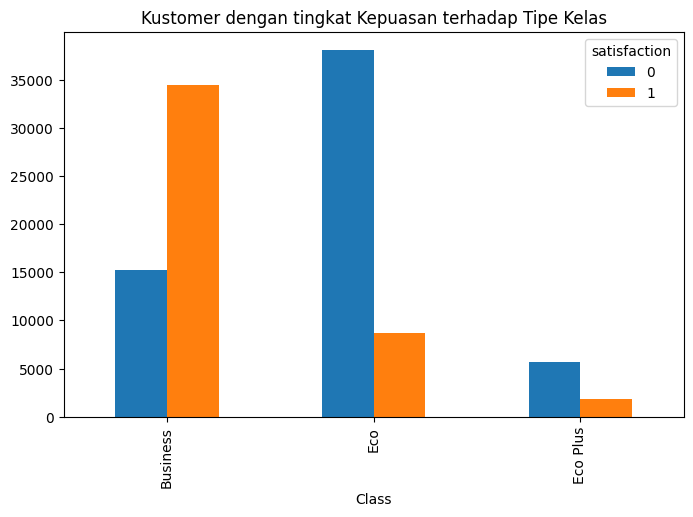

In [63]:
df_ct.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Kustomer dengan tingkat Kepuasan terhadap Tipe Kelas')
plt.show()

dari hasil cross tabullasi dan grafik di atat, kita dapat melihat bahwa tingkat kepuasan kostumer terbanyak dan tingkat ketidak puasan kostumer terbanyak. Class penerbangan Business memiliki tingkat kepuasan yang paling tertinggi terbanyak dan Econoomy memiliki tingkat kepuasan yang paling rendah terbanyak

## Berdasarkan consumer type

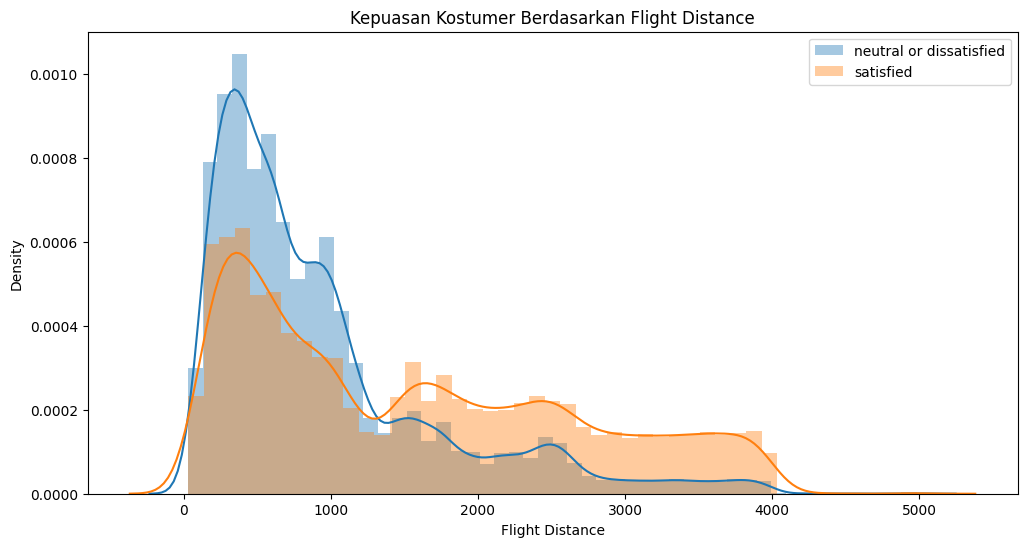

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['satisfaction']=='neutral or dissatisfied']['Flight Distance'],label='neutral or dissatisfied')
sns.distplot(df[df['satisfaction']=='satisfied']['Flight Distance'],label='satisfied')
plt.title('Kepuasan Kostumer Berdasarkan Flight Distance')
plt.legend()
plt.show()

dari grafik di atas, kita bisa melihat bahwa kecenderungan orang yang sudah puas dengan pelayanan yang di berikan maskapai berasal dari kostumer yang telah memiliki perjalaan lebih dari 1000 M.

sangat wajar dimana kostumer yang sudah melakukan perjalanan jauh akan lebih merasakan pelayanan yang di berikan oleh maskapai penerbangan tersebut. disini kita akan lihat apakah flight distance mempengaruhi kepuasan kostumer?

In [ ]:
# cek distribusi
from scipy.stats import normaltest
stats, pval=normaltest(df['Flight Distance'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [ ]:
# uji statistik, apakah ada perbedaan city_development_index antara kandidat yang berminat pindah kerja dan tidak
# karena distribusi data tidak normal, gunakan mann whitney
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['satisfaction']==i]['Flight Distance'] for i in df['satisfaction'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Ternyata adanya perbedaan yang signifikan antara kostumer yang sudah puas dan tidak puas dengan kostumer yang memiliki perjalanan penerbangan lebih rendah.

kita bisa lihat pada grafik di bawah ini bahwa kostumer yang tidak puas dengan pelayanan merupakan kostumer yang memiliki flight distance median di bawah 1000 m, sedangkan kostumer yang memiliki flight distance diatas 1000 m sudah merasa puas dengan pelayanan yang  di berikan

jika kita telaah bersama, kita mendapati bahwa tipe class ekonomi memiliki kontribusi yang besar dalam penentuan ketidak puasan kepuasan kostumer terhadap pelayanan maskappai, sedangkan class Business memiliki koontribusi besar dakan penentuan Kepuasan

disini dapat dilihat memang ketika kostumer membeli tiket dengan class business akan mendapatkan pelayanan yang lebih baik ketimbang pelayanan kelas ekonomi 

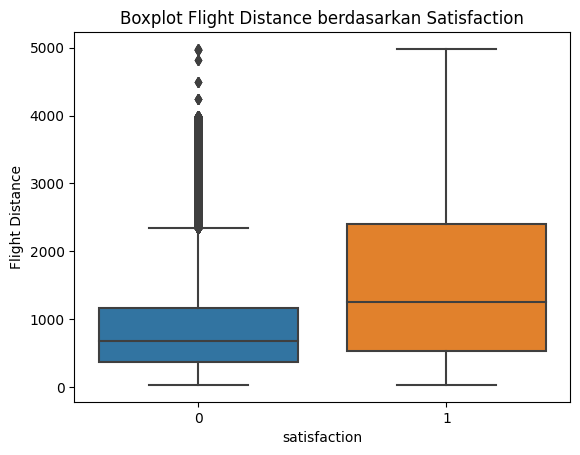

In [ ]:
sns.boxplot(y='Flight Distance', x='satisfaction', data=df)
plt.title('Boxplot Flight Distance berdasarkan Satisfaction')
plt.show()

## Kepuasan Kustomer Berdasarkan Tipe Kustomer

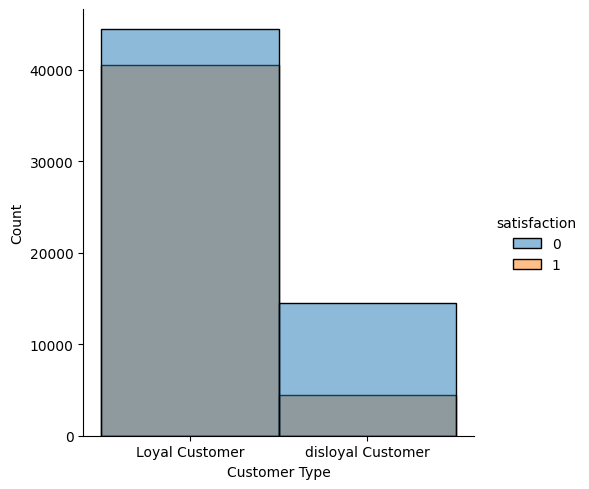

In [ ]:
sns.displot(data=df, x='Customer Type', hue='satisfaction')

Kita bisa lihat pada grafik di atas dimana Kustomer yang loyal mendominasi terhadap data Kepuasan konsumen.

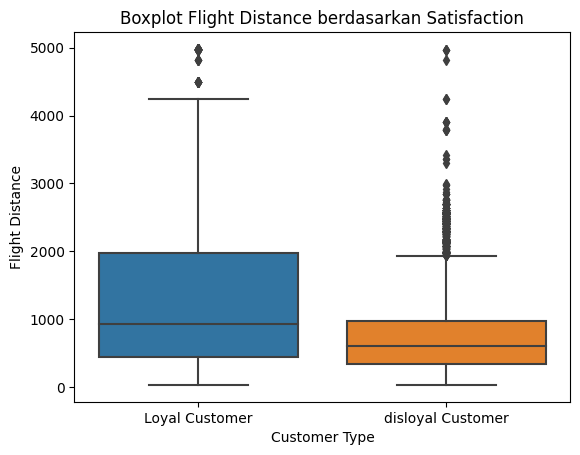

In [85]:
sns.boxplot(y='Flight Distance', x='Customer Type', data=df)
plt.title('Boxplot Flight Distance berdasarkan Satisfaction')
plt.show()

Kita bisa lihat bahwa Kustomer yang Loyal Merupakan Kustomer yang Memiliki Jarak terbang lebih dari 1000 M 

## Rata-Rata Variabel pada setiap Nilai Kepuasan konsumen

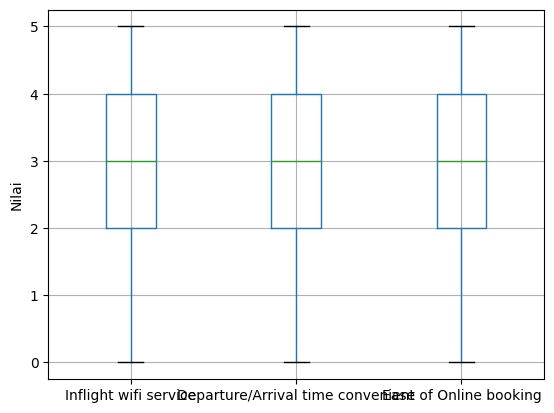

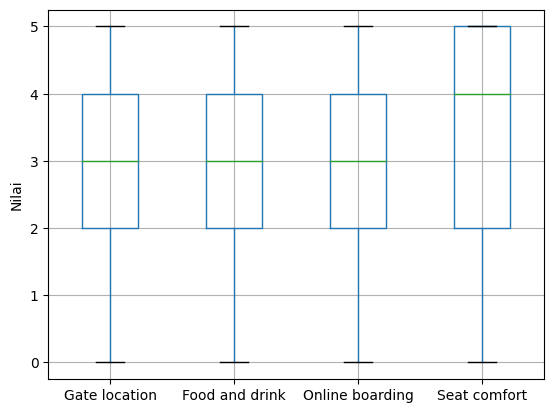

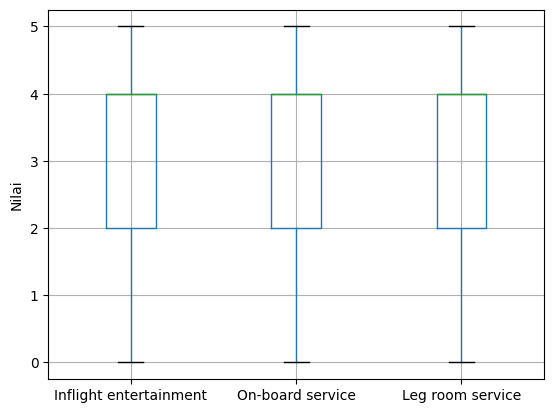

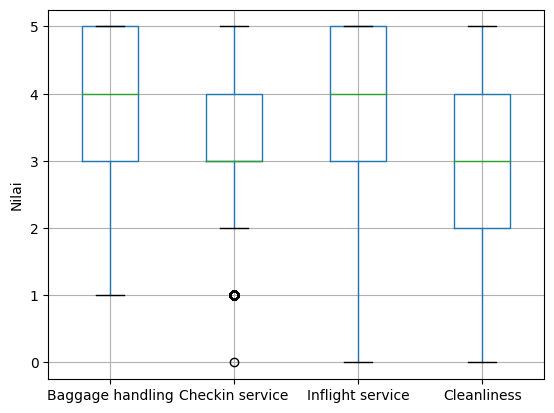

In [79]:
df.boxplot(column=['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking'])
plt.ylabel('Nilai')
plt.show()
df.boxplot(column=['Gate location', 'Food and drink', 'Online boarding', 'Seat comfort'])
plt.ylabel('Nilai')
plt.show()
df.boxplot(column=['Inflight entertainment', 'On-board service', 'Leg room service'])
plt.ylabel('Nilai')
plt.show()
df.boxplot(column=['Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'])
plt.ylabel('Nilai')
plt.show()

Dari Tabel di atas Kita dapat lihat bahwa rata-rata konsumen mendominasi untuk pilihan netral, Hal ini bisa terjadi dikarnakan kostumer Banyaknya Kostumer yang bersikap Netral dan tidak terlalu memperdulikan layanan yang di berikan oleh Airline

## Kesimpulan dan Rekomendasi

**Kesimpulan**

* Ketidak puasan Konsumen disini mendominasi dimana 58.879 Kustomer netral atau tidak merasakan kepuasan dan 45.025 sudah merasa puas dengan pelayanan Airline
* Ketidak puasan konsumen tersebut dapat terlihat dari boxplot rata-rata setiap variabel konsumen memilih 3 dimana bisa di anggap netral
* untuk berdasarkan Tipe kelas konsumen tingkat kepuasan di dominasi oleh tipe kelas business dan juga economy. dimana tipe kelas business mendominasi tingkat kepuasan sangat baik dan tipe kelas ekonomi mendominasi tingkat kepuasan yang kurang atau netral
* dan kita dapatkan bahwa konsumen yang memiliki jarak terbang lebih dari 1000 m merasakan tingkat kepuasan yang baik dari pada konsumen yang terbang di bawah 1000 m
* dan kita temukan bahwa konsumen yang memiliki jarak terbang di atas 1000 merupakan konsumen yang loyal pada airline sedangkan kebalikannya konsumen yang terbang di bawah 1000 m merupakan konsumen yang tidak loyal
* kita dapat menyimpulkan juga bahwa Konsumen yang loyal tidak terlalu memerhatikan pelayanan yang telah di berikan airline atau menurut mereka sudah cukup sehingga pada variabel yang mendukung statisfaction rata-rata pemilihan konsumen adalah netral 
* dan beberapa pelayanan masih membuat konsumen masih kurang merasa puas

**Rekomendasi**

sebagai rekomendasi yang dapat dilakukan oleh airline adalah 
1. tingkatkan pelayanan yang sudah di berikan sehingga dapat lebih di notice oleh konsumen. karna pada analisis ini kita menemukan bahwa rata-rata konsumen memilih untuk netral
2. memberikan pelayanan maximal pada batas tertentu pada setiap konsumen dari business class maupun ekonomi, disini kelas ekonomi paling banyak merasa netral atau tidak puas
3. tingkatkan pelayan yang dirasa konsumen masih kurang puas. disini kita temukan bahwa hampir semua pelayanan yang di berikan memiliki nilai kepuasan konsumen yang kurang puas. seperti keberihan, leg room service, entertaiment di pesawat, on board service dan beberapa layanan lain yang masih memiliki nilai 2 (kurang puas). sehingga pada survey berikutnya konsumen dapat memberikan penilaian yang lebih baik lagi dan tidak banyak yang memberikan nilai netral atau kurang puas pada penilaiannya.